In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

1. Есть ли различие между процентным содержанием изотопов плутония? Используйте функции в
Python

Провести предварительный разведочный анализ (проверку на нормальность и равенство
дисперсий*)

In [16]:
pu_238 = np.array([0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439, 1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367])
stats.shapiro(pu_238) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.8199635744094849, pvalue=6.733238933520624e-06)

pvalue=6.733238933520624e-06 < 5%, есть отличие от нормальности. Таки образом не можем проводить дисперсионный анализ

In [17]:
pu_239 = np.array([75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840, 62.455, 73.189, 75.968, 75.957, 72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845, 62.382, 60.112, 60.519, 61.585, 61.332, 72.291, 73.451, 74.888, 60.507])
stats.shapiro(pu_239) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.8647032380104065, pvalue=8.951310883276165e-05)

In [18]:
pu_240 = np.array([21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692, 25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285, 20.794, 20.867, 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869, 18.122, 20.750, 20.345, 19.108, 22.754, 23.320, 23.128, 23.133, 23.239, 21.761, 21.429, 20.939, 23.603])
stats.shapiro(pu_240) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.9316781759262085, pvalue=0.010755813680589199)

In [19]:
pu_241 = np.array([2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569, 8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512, 5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556, 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839])
stats.shapiro(pu_241) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.8336212635040283, pvalue=1.4246789760363754e-05)

Так как все группы изотопов не прошли тест на нормальность. Используем непараметрические тесты. Например Крускала-Уоллеса

In [20]:
stats.kruskal(pu_238, pu_239, pu_240, pu_241)

KruskalResult(statistic=167.8178522154513, pvalue=3.76478949748032e-36)

Так как pvalue=3.76478949748032e-36 < 5% принимае альтернативную гипотезу. То есть есть статистически значимые различия между процентным содержанием изотопов плутония

2. Даны квартальные прибыли акции Johnson&Johnson с 1960-1980 гг

Есть ли различия прибыли между 4-мя кварталами?

Провести EDA (проверка на нормальность, проверка на однородность дисперсий с помощью Барлетт теста
from scipy.stats import bartlett)

Учитывайте при выборе теста тот факт, что при сбалансированных данных (выборки одинакового объема),
неоднородность дисперсий слабо влияет на результат)

In [21]:
JJ_1=np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ])
JJ_2=np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ])
JJ_3=np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83])
JJ_4=np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ])

In [22]:
stats.shapiro(JJ_1) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.9837694764137268, pvalue=0.9688350558280945)

In [23]:
stats.shapiro(JJ_2) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.9252575635910034, pvalue=0.11057926714420319)

In [24]:
stats.shapiro(JJ_3) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.9523218274116516, pvalue=0.37654614448547363)

In [25]:
stats.shapiro(JJ_4) #проводим тест Шапиро на нормальность

ShapiroResult(statistic=0.9590807557106018, pvalue=0.49780404567718506)

Везде pvalue > 5%, значит тест на нормальность пройден. Распределение нормально

In [30]:
stats.bartlett(JJ_1, JJ_2, JJ_3, JJ_4)  #проводим тест на однородность дисперсии

BartlettResult(statistic=109.62893110687119, pvalue=1.3188378332498392e-23)

pvalue=1.3188378332498392e-23 < 5%, есть различия в дисперсиях. 

Однако при сбалансированных данных (выборки одинакового объема),
неоднородность дисперсий слабо влияет на результат

In [31]:
stats.kruskal(JJ_1, JJ_2, JJ_3, JJ_4) 

KruskalResult(statistic=77.04853477998796, pvalue=1.318184789753617e-16)

In [32]:
stats.f_oneway(JJ_1, JJ_2, JJ_3, JJ_4) #проводим дисперсионный анализ

F_onewayResult(statistic=162.03157448390618, pvalue=6.813074435306209e-34)

pvalue=6.813074435306209e-34 < 5%, есть статистически значимые отличия, значит принимаем альтернативную гипотезу. 

Такимо образом есть различия прибыли между 4-мя кварталами?

<Axes: >

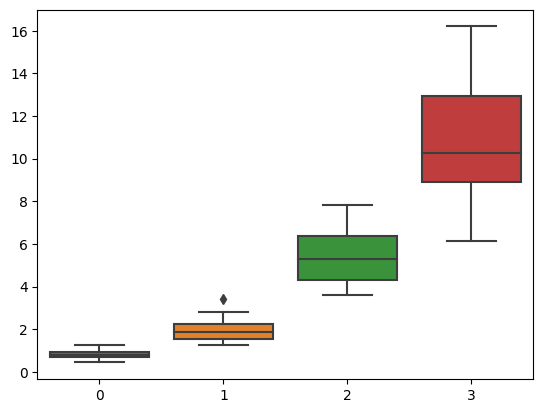

In [33]:
import seaborn
seaborn.boxplot(data=[JJ_1, JJ_2, JJ_3, JJ_4])

3. Провести post hoc tests к задаче 2
Между какими группами не обнаружено статистически значимых различий?

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

In [36]:
df = pd.DataFrame({'score' :[ 0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16,
                              1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42,
                              3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83,
                              6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61],
                    'group': np.repeat(['1_kvartal', '2_kvartal', '3_kvartal', '4_kvartal'], repeats=len(JJ_1))})
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
1_kvartal 2_kvartal   1.1276 0.1282 -0.2087   2.464  False
1_kvartal 3_kvartal     4.61    0.0  3.2737  5.9463   True
1_kvartal 4_kvartal  10.1986    0.0  8.8622 11.5349   True
2_kvartal 3_kvartal   3.4824    0.0   2.146  4.8187   True
2_kvartal 4_kvartal    9.071    0.0  7.7346 10.4073   True
3_kvartal 4_kvartal   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------------


Различия не обнаружены между 1 и 2 группой

In [38]:
print(stats.tukey_hsd(JJ_1, JJ_2, JJ_3, JJ_4))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.128     0.128    -2.464     0.209
 (0 - 2)     -4.610     0.000    -5.946    -3.274
 (0 - 3)    -10.199     0.000   -11.535    -8.862
 (1 - 0)      1.128     0.128    -0.209     2.464
 (1 - 2)     -3.482     0.000    -4.819    -2.146
 (1 - 3)     -9.071     0.000   -10.407    -7.735
 (2 - 0)      4.610     0.000     3.274     5.946
 (2 - 1)      3.482     0.000     2.146     4.819
 (2 - 3)     -5.589     0.000    -6.925    -4.252
 (3 - 0)     10.199     0.000     8.862    11.535
 (3 - 1)      9.071     0.000     7.735    10.407
 (3 - 2)      5.589     0.000     4.252     6.925



Другой метод: здесь также можно увидеть по p-value что 1 и 0 не отличаются

4. Даны веса пациентов до и после диеты. Веса распределены нормально

До 92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9

После 87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6

Проверить гипотезу о, том что средний вес пациентов после диеты статистически
меньше веса до диеты

1) Используйте alternative='greater‘

2) alternative=‘less‘

3) 'two-sided'

Объясните полученные результаты p-value для каждого случая

In [40]:
before = np.array([92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9])
after = np.array([87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6])

Делам тест стьюдента на зависимость с учетом связанности измерений до и после

Вначале проверка что вес увеличился

In [41]:
stats.ttest_rel(before, after,alternative='greater')

TtestResult(statistic=7.972831441034037, pvalue=1.137221372340802e-05, df=9)

pvalue=1.137221372340802e-05 < 5% , значит оставляем H0

Затем проверка что уменшился

In [42]:
stats.ttest_rel(before, after,alternative='less')

TtestResult(statistic=7.972831441034037, pvalue=0.9999886277862766, df=9)

pvalue=0.9999886277862766 > 5%, значит принимаем альтернатиную гипотезу, что диета влияет на снижение веса

In [43]:
stats.ttest_rel(before, after,alternative='two-sided')

TtestResult(statistic=7.972831441034037, pvalue=2.274442744681604e-05, df=9)

6. В одной группе из 100 больных наблюдалось улучшение у 75, а в другой из 100 больных
среди 69. Оценить с помощью доверительного интервала разность долей больных, у
которых наблюдались улучшения.

In [44]:
m1=75
m2=69
n1=100
n2=100

In [45]:
p1=m1/n1
p1

0.75

In [46]:
p2=m2/n2
p2

0.69

In [47]:
p=(m1+m2)/(n1+n2)
p

0.72

In [48]:
delta = p1-p2
delta

0.06000000000000005

In [52]:
SE=((p*(1-p))*(1/n1+1/n2))**0.5
SE

0.06349803146555018

In [53]:
z_95 = stats.norm.ppf(0.995)
z_95

2.5758293035489004

In [54]:
print(delta-SE*z_95,delta+SE*z_95)

-0.10356009016663423 0.22356009016663433


Так как интервал включает ноль, то различий между долями нет

7. Какова вероятность, что в наудачу выбранном двузначном числе цифры одинаковые

In [55]:
9/90

0.1